# Notebook containing analysis of X-chromosome recombination rates 

In [1]:
## Libraries

#import datashader as ds, pandas as pd
#import datashader.transfer_functions as tf
import rpy2
import numpy as np
import pandas as pd
import scipy as sp
#import datetime
#import holoviews as hv
#from holoviews import opts
#hv.extension('bokeh')
from PIL.Image import core as _imaging
import os, sys
from PIL import Image
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#yaml.warnings({'YAMLLoadWarning': False})

## Input Arguments

### 1). Importing data from MIGFI, CEU and 1KG_Finn samples for PAR1 

In [4]:
## 1000 Genomes Finnish samples - Recombination rate data from LDHAT for PAR1
kg_fem_par1 = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/1kg/PAR1/1kg_females/LDhat/1kg_61_females_PAR1.txt",
                         delimiter = '\t',
                         skiprows = [1])
kg_male_par1 = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/1kg/PAR1/1kg_males/LDhat/1kg_38_males_PAR1.txt",
                         delimiter = '\t',
                         skiprows = [1])
kg_all_par1 = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/1kg/PAR1/1kg_all_samples/LDhat/1kg_96_samples_PAR1.txt",
                         delimiter = '\t',
                         skiprows = [1])

## 1000 Genomes Finnish samples - list of positions in PAR1
kg_fem_par1_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/1kg_61_females_PAR1_positions.txt", 
                              header = None, names = ['Positions'])
kg_male_par1_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/1kg_38_males_PAR1_positions.txt", 
                              header = None, names = ['Positions'])
kg_all_par1_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/1kg_96_samples_PAR1_positions.txt", 
                              header = None, names = ['Positions'])

## Binding the LDHAT results above with the loci positions
kg_fem_par1 = pd.concat([kg_fem_par1_pos, kg_fem_par1[['Median']]], axis=1)
kg_male_par1 = pd.concat([kg_male_par1_pos, kg_male_par1[['Median']]], axis=1)
kg_all_par1 = pd.concat([kg_all_par1_pos, kg_all_par1[['Median']]], axis=1)

In [5]:
kg_fem_par1.head(2)

,Positions,Median
0,60026,7.67354
1,60032,7.67887


In [6]:
## 1000 Genomes CEU samples -  Recombination rate data from LDHAT for PAR1
ceu_fem_par1 = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu/PAR1/ceu_females/LDhat/ceu_50_females_PAR1.txt",
                         delimiter = '\t',
                         skiprows = [1])
ceu_male_par1 = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu/PAR1/ceu_males/LDhat/ceu_49_males_PAR1.txt",
                         delimiter = '\t',
                         skiprows = [1])
ceu_all_par1 = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu/PAR1/ceu_all_samples/LDhat/ceu_94_samples_PAR1.txt",
                         delimiter = '\t',
                         skiprows = [1])

## 1000 Genomes CEU samples - list of positions in PAR1
ceu_fem_par1_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu_50_females_PAR1_positions.txt", 
                              header = None, names = ['Positions'])
ceu_male_par1_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu_49_males_PAR1_positions.txt", 
                              header = None, names = ['Positions'])
ceu_all_par1_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu_94_samples_PAR1_positions.txt", 
                              header = None, names = ['Positions'])

## Binding the LDHAT results above with the loci positions
ceu_fem_par1 = pd.concat([ceu_fem_par1_pos, ceu_fem_par1[['Median']]], axis=1)
ceu_male_par1 = pd.concat([ceu_male_par1_pos, ceu_male_par1[['Median']]], axis=1)
ceu_all_par1 = pd.concat([ceu_all_par1_pos, ceu_all_par1[['Median']]], axis=1)

In [5]:
## Migraine samples -  Recombination rate data from LDHAT for PAR1
migfi_fem_par1 = pd.read_csv("/Users/shabbeerhassan/PAR/migraine/PAR1/migraine_females/LDhat/migfi_48_females_PAR1.txt",
                         delimiter = '\t',
                         skiprows = [1])
migfi_male_par1 = pd.read_csv("/Users/shabbeerhassan/PAR/migraine/PAR1/migraine_males/LDhat/migfi_55_males_PAR1.txt",
                         delimiter = '\t',
                         skiprows = [1])
migfi_all_par1 = pd.read_csv("/Users/shabbeerhassan/PAR/migraine/PAR1/migraine_all_samples/LDhat/migfi_96_samples_PAR1.txt",
                         delimiter = '\t',
                         skiprows = [1])

## Migraine samples - list of positions in PAR1
migfi_fem_par1_pos = pd.read_csv("/Users/shabbeerhassan/PAR/Migfi_48_females_PAR1_positions.txt", 
                              header = None, names = ['Positions'])
migfi_male_par1_pos = pd.read_csv("/Users/shabbeerhassan/PAR/Migfi_55_males_PAR1_positions.txt", 
                              header = None, names = ['Positions'])
migfi_all_par1_pos = pd.read_csv("/Users/shabbeerhassan/PAR/Migfi_96_samples_PAR1_positions.txt", 
                              header = None, names = ['Positions'])

## Binding the LDHAT results above with the loci positions
migfi_fem_par1 = pd.concat([migfi_fem_par1_pos, migfi_fem_par1[['Median']]], axis=1)
migfi_male_par1 = pd.concat([migfi_male_par1_pos, migfi_male_par1[['Median']]], axis=1)
migfi_all_par1 = pd.concat([migfi_all_par1_pos, migfi_all_par1[['Median']]], axis=1)

In [13]:
## Migraine samples randomly chosen for indepedent samples -  Recombination rate data from LDHAT for PAR1
migfi_random_fem_par1 = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/migraine/Migfi_20_random_females_PAR1_rates.txt",
                         delimiter = '\t',
                         skiprows = [1])
migfi_random_male_par1 = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/migraine/Migfi_20_random_males_PAR1_rates.txt",
                         delimiter = '\t',
                         skiprows = [1])
migfi_random_all_par1 = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/migraine/Migfi_40_random_samples_PAR1_rates.txt",
                         delimiter = '\t',
                         skiprows = [1])

## Migraine samples - list of positions in PAR1
migfi_random_fem_par1_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/MIGFI_20_unrelated_females_PAR1_positions.txt", 
                              header = None, names = ['Positions'])
migfi_random_male_par1_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/MIGFI_20_unrelated_males_PAR1_positions.txt", 
                              header = None, names = ['Positions'])
migfi_random_all_par1_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/MIGFI_40_unrelated_samples_PAR1_positions.txt", 
                              header = None, names = ['Positions'])

## Binding the LDHAT results above with the loci positions
migfi_random_fem_par1 = pd.concat([migfi_random_fem_par1_pos, migfi_random_fem_par1[['Median']]], axis=1)
migfi_random_male_par1 = pd.concat([migfi_random_male_par1_pos, migfi_random_male_par1[['Median']]], axis=1)
migfi_random_all_par1 = pd.concat([migfi_random_all_par1_pos, migfi_random_all_par1[['Median']]], axis=1)

### 2). Importing data from MIGFI, CEU and 1KG_Finn samples for PAR2

In [6]:
## 1000 Genomes Finnish samples - Recombination rate data from LDHAT for PAR2
kg_fem_par2 = pd.read_csv("/Users/shabbeerhassan/PAR/1kg/PAR2/1kg_females/LDhat/1kg_61_females_PAR2.txt",
                         delimiter = '\t',
                         skiprows = [1])
kg_male_par2 = pd.read_csv("/Users/shabbeerhassan/PAR/1kg/PAR2/1kg_males/LDhat/1kg_38_males_PAR2.txt",
                         delimiter = '\t',
                         skiprows = [1])
kg_all_par2 = pd.read_csv("/Users/shabbeerhassan/PAR/1kg/PAR2/1kg_all_samples/LDhat/1kg_96_samples_PAR2.txt",
                         delimiter = '\t',
                         skiprows = [1])

## 1000 Genomes Finnish samples - list of positions in PAR1
kg_fem_par2_pos = pd.read_csv("/Users/shabbeerhassan/PAR/1kg_61_females_PAR2_positions.txt", 
                              header = None, names = ['Positions'])
kg_male_par2_pos = pd.read_csv("/Users/shabbeerhassan/PAR/1kg_38_males_PAR2_positions.txt", 
                              header = None, names = ['Positions'])
kg_all_par2_pos = pd.read_csv("/Users/shabbeerhassan/PAR/1kg_96_samples_PAR2_positions.txt", 
                              header = None, names = ['Positions'])

## Binding the LDHAT results above with the loci positions
kg_fem_par2 = pd.concat([kg_fem_par2_pos, kg_fem_par2[['Median']]], axis=1)
kg_male_par2 = pd.concat([kg_male_par2_pos, kg_male_par2[['Median']]], axis=1)
kg_all_par2 = pd.concat([kg_all_par2_pos, kg_all_par2[['Median']]], axis=1)

In [16]:
## 1000 Genomes CEU samples -  Recombination rate data from LDHAT for PAR2
ceu_fem_par2 = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu/PAR2/ceu_females/LDhat/ceu_50_females_PAR2.txt",
                         delimiter = '\t',
                         skiprows = [1])
ceu_male_par2 = pd.read_csv("//Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu/PAR2/ceu_males/LDhat/ceu_49_males_PAR2.txt",
                         delimiter = '\t',
                         skiprows = [1])
ceu_all_par2 = pd.read_csv("//Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu/PAR2/ceu_all_samples/LDhat/ceu_94_samples_PAR2.txt",
                         delimiter = '\t',
                         skiprows = [1])

## 1000 Genomes CEU samples - list of positions in PAR2
ceu_fem_par2_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu_50_females_PAR2_positions.txt", 
                              header = None, names = ['Positions'])
ceu_male_par2_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu_49_males_PAR2_positions.txt", 
                              header = None, names = ['Positions'])
ceu_all_par2_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu_94_samples_PAR2_positions.txt", 
                              header = None, names = ['Positions'])

## Binding the LDHAT results above with the loci positions
ceu_fem_par2 = pd.concat([ceu_fem_par2_pos, ceu_fem_par2[['Median']]], axis=1)
ceu_male_par2 = pd.concat([ceu_male_par2_pos, ceu_male_par2[['Median']]], axis=1)
ceu_all_par2 = pd.concat([ceu_all_par2_pos, ceu_all_par2[['Median']]], axis=1)

In [8]:
## Migraine samples -  Recombination rate data from LDHAT for PAR2
migfi_fem_par2 = pd.read_csv("/Users/shabbeerhassan/PAR/migraine/PAR2/migraine_females/LDhat/migfi_48_females_PAR2.txt",
                         delimiter = '\t',
                         skiprows = [1])
migfi_male_par2 = pd.read_csv("/Users/shabbeerhassan/PAR/migraine/PAR2/migraine_males/LDhat/migfi_55_males_PAR2.txt",
                         delimiter = '\t',
                         skiprows = [1])
migfi_all_par2 = pd.read_csv("/Users/shabbeerhassan/PAR/migraine/PAR2/migraine_all_samples/LDhat/migfi_96_samples_PAR2.txt",
                         delimiter = '\t',
                         skiprows = [1])

## Migraine samples - list of positions in PAR2
migfi_fem_par2_pos = pd.read_csv("/Users/shabbeerhassan/PAR/Migfi_48_females_PAR2_positions.txt", 
                              header = None, names = ['Positions'])
migfi_male_par2_pos = pd.read_csv("/Users/shabbeerhassan/PAR/Migfi_55_males_PAR2_positions.txt", 
                              header = None, names = ['Positions'])
migfi_all_par2_pos = pd.read_csv("/Users/shabbeerhassan/PAR/Migfi_96_samples_PAR2_positions.txt", 
                              header = None, names = ['Positions'])

## Binding the LDHAT results above with the loci positions
migfi_fem_par2 = pd.concat([migfi_fem_par2_pos, migfi_fem_par2[['Median']]], axis=1)
migfi_male_par2 = pd.concat([migfi_male_par2_pos, migfi_male_par2[['Median']]], axis=1)
migfi_all_par2 = pd.concat([migfi_all_par2_pos, migfi_all_par2[['Median']]], axis=1)

In [14]:
## Migraine samples randomly chosen for indepedent samples -  Recombination rate data from LDHAT for PAR2
migfi_random_fem_par2 = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/migraine/Migfi_20_random_females_PAR2_rates.txt",
                         delimiter = '\t',
                         skiprows = [1])
migfi_random_male_par2 = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/migraine/Migfi_20_random_males_PAR2_rates.txt",
                         delimiter = '\t',
                         skiprows = [1])
migfi_random_all_par2 = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/migraine/Migfi_40_random_samples_PAR2_rates.txt",
                         delimiter = '\t',
                         skiprows = [1])

## Migraine samples - list of positions in PAR2
migfi_random_fem_par2_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/MIGFI_20_unrelated_females_PAR2_positions.txt", 
                              header = None, names = ['Positions'])
migfi_random_male_par2_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/MIGFI_20_unrelated_males_PAR2_positions.txt", 
                              header = None, names = ['Positions'])
migfi_random_all_par2_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/MIGFI_40_unrelated_samples_PAR2_positions.txt", 
                              header = None, names = ['Positions'])

## Binding the LDHAT results above with the loci positions
migfi_random_fem_par2 = pd.concat([migfi_random_fem_par2_pos, migfi_random_fem_par2[['Median']]], axis=1)
migfi_random_male_par2 = pd.concat([migfi_random_male_par2_pos, migfi_random_male_par2[['Median']]], axis=1)
migfi_random_all_par2 = pd.concat([migfi_random_all_par2_pos, migfi_random_all_par2[['Median']]], axis=1)

### 3). Importing data from MIGFI, CEU and 1KG_Finn samples for XTR

In [9]:
## 1000 Genomes Finnish samples - Recombination rate data from LDHAT for XTR
kg_fem_xtr = pd.read_csv("/Users/shabbeerhassan/PAR/1kg/XTR/1kg_females/LDhat/1kg_61_females_XTR.txt",
                         delimiter = '\t',
                         skiprows = [1])
kg_male_xtr = pd.read_csv("/Users/shabbeerhassan/PAR/1kg/XTR/1kg_males/LDhat/1kg_38_males_XTR.txt",
                         delimiter = '\t',
                         skiprows = [1])
kg_all_xtr = pd.read_csv("/Users/shabbeerhassan/PAR/1kg/XTR/1kg_all_samples/LDhat/1kg_96_samples_XTR.txt",
                         delimiter = '\t',
                         skiprows = [1])

## 1000 Genomes Finnish samples - list of positions in XTR
kg_fem_xtr_pos = pd.read_csv("/Users/shabbeerhassan/PAR/1kg_61_females_XTR_positions.txt", 
                              header = None, names = ['Positions'])
kg_male_xtr_pos = pd.read_csv("/Users/shabbeerhassan/PAR/1kg_38_males_XTR_positions.txt", 
                              header = None, names = ['Positions'])
kg_all_xtr_pos = pd.read_csv("/Users/shabbeerhassan/PAR/1kg_96_samples_XTR_positions.txt", 
                              header = None, names = ['Positions'])

## Binding the LDHAT results above with the loci positions
kg_fem_xtr = pd.concat([kg_fem_xtr_pos, kg_fem_xtr[['Median']]], axis=1)
kg_male_xtr = pd.concat([kg_male_xtr_pos, kg_male_xtr[['Median']]], axis=1)
kg_all_xtr = pd.concat([kg_all_xtr_pos, kg_all_xtr[['Median']]], axis=1)

In [18]:
## 1000 Genomes CEU samples -  Recombination rate data from LDHAT for XTR
ceu_fem_xtr = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu/XTR/ceu_females/LDhat/ceu_50_females_XTR.txt",
                         delimiter = '\t',
                         skiprows = [1])
ceu_male_xtr = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu/XTR/ceu_males/LDhat/ceu_49_males_XTR.txt",
                         delimiter = '\t',
                         skiprows = [1])
ceu_all_xtr = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu/XTR/ceu_all_samples/LDhat/ceu_94_samples_XTR.txt",
                         delimiter = '\t',
                         skiprows = [1])

## 1000 Genomes CEU samples - list of positions in XTR
ceu_fem_xtr_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu_50_females_XTR_positions.txt", 
                              header = None, names = ['Positions'])
ceu_male_xtr_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu_49_males_XTR_positions.txt", 
                              header = None, names = ['Positions'])
ceu_all_xtr_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/ceu_94_samples_XTR_positions.txt", 
                              header = None, names = ['Positions'])

## Binding the LDHAT results above with the loci positions
ceu_fem_xtr = pd.concat([ceu_fem_xtr_pos, ceu_fem_xtr[['Median']]], axis=1)
ceu_male_xtr = pd.concat([ceu_male_xtr_pos, ceu_male_xtr[['Median']]], axis=1)
ceu_all_xtr = pd.concat([ceu_all_xtr_pos, ceu_all_xtr[['Median']]], axis=1)

In [11]:
## Migraine samples -  Recombination rate data from LDHAT for XTR
migfi_fem_xtr = pd.read_csv("/Users/shabbeerhassan/PAR/migraine/XTR/migraine_females/LDhat/migfi_48_females_XTR.txt",
                         delimiter = '\t',
                         skiprows = [1])
migfi_male_xtr = pd.read_csv("/Users/shabbeerhassan/PAR/migraine/XTR/migraine_males/LDhat/migfi_55_males_XTR.txt",
                         delimiter = '\t',
                         skiprows = [1])
migfi_all_xtr = pd.read_csv("/Users/shabbeerhassan/PAR/migraine/XTR/migraine_all_samples/LDhat/migfi_96_samples_XTR.txt",
                         delimiter = '\t',
                         skiprows = [1])

## Migraine samples - list of positions in XTR
migfi_fem_xtr_pos = pd.read_csv("/Users/shabbeerhassan/PAR/Migfi_48_females_XTR_positions.txt", 
                              header = None, names = ['Positions'])
migfi_male_xtr_pos = pd.read_csv("/Users/shabbeerhassan/PAR/Migfi_55_males_XTR_positions.txt", 
                              header = None, names = ['Positions'])
migfi_all_xtr_pos = pd.read_csv("/Users/shabbeerhassan/PAR/Migfi_96_samples_XTR_positions.txt", 
                              header = None, names = ['Positions'])

## Binding the LDHAT results above with the loci positions
migfi_fem_xtr = pd.concat([migfi_fem_xtr_pos, migfi_fem_xtr[['Median']]], axis=1)
migfi_male_xtr = pd.concat([migfi_male_xtr_pos, migfi_male_xtr[['Median']]], axis=1)
migfi_all_xtr = pd.concat([migfi_all_xtr_pos, migfi_all_xtr[['Median']]], axis=1)

In [49]:
## Migraine samples randomly chosen for indepedent samples -  Recombination rate data from LDHAT for XTR
migfi_random_fem_xtr = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/migraine/Migfi_20_random_females_XTR_rates.txt",
                         delimiter = '\t',
                         skiprows = [1])
migfi_random_male_xtr = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/migraine/Migfi_20_random_males_XTR_rates.txt",
                         delimiter = '\t',
                         skiprows = [1])
migfi_random_all_xtr = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/migraine/Migfi_40_random_samples_XTR_rates.txt",
                         delimiter = '\t',
                         skiprows = [1])

## Migraine samples - list of positions in XTR
migfi_random_fem_xtr_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/MIGFI_20_unrelated_females_XTR_positions.txt", 
                              header = None, names = ['Positions'])
migfi_random_male_xtr_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/MIGFI_20_unrelated_males_XTR_positions.txt", 
                              header = None, names = ['Positions'])
migfi_random_all_xtr_pos = pd.read_csv("/Users/shabbeerhassan/PAR/recomb_rate/chrX/ldhat/MIGFI_40_unrelated_samples_XTR_positions.txt", 
                              header = None, names = ['Positions'])

## Binding the LDHAT results above with the loci positions
migfi_random_fem_xtr = pd.concat([migfi_random_fem_xtr_pos, migfi_random_fem_xtr[['Median']]], axis=1)
migfi_random_male_xtr = pd.concat([migfi_random_male_xtr_pos, migfi_random_male_xtr[['Median']]], axis=1)
migfi_random_all_xtr = pd.concat([migfi_random_all_xtr_pos, migfi_random_all_xtr[['Median']]], axis=1)

## Dataset prep

#### 1). Migraine dataset wrt region of X-chromosome under study

In [12]:
## Finnish PAR1 combined

# Combine Females, males and average rates along with positions in one dataframe
Finns_PAR1 = pd.concat([migfi_fem_par1[['Positions']], 
                        migfi_fem_par1[['Median']] * (1e8/(4*1e4*7500)),
                        migfi_male_par1[['Median']] * (1e8/(4*1e4*7500)),
                        migfi_all_par1[['Median']] * (1e8/(4*1e4*7500))],
                        axis=1,
                        sort=False)

# Rename column names
Finns_PAR1.columns = ["Positions", "Fem_rate", "Male_rate", "Avg_rate"]

In [22]:
## Finnish PAR1 combined - random individuals only 

# Combine Females, males and average rates along with positions in one dataframe
Finns_random_PAR1 = pd.concat([migfi_random_fem_par1[['Positions']], 
                        migfi_random_fem_par1[['Median']] * (1e8/(4*1e4*7500)),
                        migfi_random_male_par1[['Median']] * (1e8/(4*1e4*7500)),
                        migfi_random_all_par1[['Median']] * (1e8/(4*1e4*7500))],
                        axis=1,
                        sort=False)

# Rename column names
Finns_random_PAR1.columns = ["Positions", "Fem_rate", "Male_rate", "Avg_rate"]

In [23]:
# Check out the dataframe
#Finns_PAR1.head()
Finns_random_PAR1.head()

,Positions,Fem_rate,Male_rate,Avg_rate
0,60052,2.218137,1.591197,2.110567
1,60069,2.220190,1.601313,2.114673
2,60112,2.222037,1.609140,2.114673
3,60153,2.222120,1.632287,2.114673
4,60185,2.222120,1.648880,2.114673


In [14]:
print (Finns_PAR1.dtypes)

Positions      int64
Fem_rate     float64
Male_rate    float64
Avg_rate     float64
dtype: object


In [24]:
## Finnish PAR2 combined - random individuals only 

# Combine Females, males and average rates along with positions in one dataframe
Finns_random_PAR2 = pd.concat([migfi_random_fem_par2[['Positions']], 
                        migfi_random_fem_par2[['Median']] * (1e8/(4*1e4*7500)),
                        migfi_random_male_par2[['Median']] * (1e8/(4*1e4*7500)),
                        migfi_random_all_par2[['Median']] * (1e8/(4*1e4*7500))],
                        axis=1,
                        sort=False)

# Rename column names
Finns_random_PAR2.columns = ["Positions", "Fem_rate", "Male_rate", "Avg_rate"]

In [15]:
## Finnish PAR2 combined

# Combine Females, males and average rates along with positions in one dataframe
Finns_PAR2 = pd.concat([migfi_fem_par2[['Positions']], 
                        migfi_fem_par2[['Median']] * (1e8/(4*1e4*7500)),
                        migfi_male_par2[['Median']] * (1e8/(4*1e4*7500)),
                        migfi_all_par2[['Median']] * (1e8/(4*1e4*7500))],
                        axis=1,
                        sort=False)

# Rename column names
Finns_PAR2.columns = ["Positions", "Fem_rate", "Male_rate", "Avg_rate"]

In [48]:
## Finnish XTR combined

# Combine Females, males and average rates along with positions in one dataframe
Finns_XTR = pd.concat([migfi_fem_xtr[['Positions']], 
                        migfi_fem_xtr[['Median']] * (1e8/(4*1e4*7500)),
                        migfi_male_xtr[['Median']] * (1e8/(4*1e4*7500)),
                        migfi_all_xtr[['Median']] * (1e8/(4*1e4*7500))],
                        axis=1,
                        sort=False)

# Rename column names
Finns_XTR.columns = ["Positions", "Fem_rate", "Male_rate", "Avg_rate"]

NameError: name 'migfi_fem_xtr' is not defined

In [53]:
## Finnish XTR combined - random individuals only 

# Combine Females, males and average rates along with positions in one dataframe
Finns_random_XTR = pd.concat([migfi_random_fem_xtr[['Positions']], 
                        migfi_random_fem_xtr[['Median']] * (1e8/(4*1e4*7500)),
                        migfi_random_male_xtr[['Median']] * (1e8/(4*1e4*7500)),
                        migfi_random_all_xtr[['Median']] * (1e8/(4*1e4*7500))],
                        axis=1,
                        sort=False)

# Rename column names
Finns_random_XTR.columns = ["Positions", "Fem_rate", "Male_rate", "Avg_rate"]

#### 2). 1000 Genomes Finnish dataset wrt region of X-chromosome under study

In [17]:
## 1000 Genomes Finnish PAR1 combined

# Combine Females, males and average rates along with positions in one dataframe
KG_Finns_PAR1 = pd.concat([kg_fem_par1[['Positions']], 
                        kg_fem_par1[['Median']] * (1e8/(4*1e4*7500)),
                        kg_male_par1[['Median']] * (1e8/(4*1e4*7500)),
                        kg_all_par1[['Median']] * (1e8/(4*1e4*7500))],
                        axis=1,
                        sort=False)

# Rename column names
KG_Finns_PAR1.columns = ["Positions", "Fem_rate", "Male_rate", "Avg_rate"]

In [18]:
## 1000 Genomes Finnish PAR2 combined

# Combine Females, males and average rates along with positions in one dataframe
KG_Finns_PAR2 = pd.concat([kg_fem_par2[['Positions']], 
                        kg_fem_par2[['Median']] * (1e8/(4*1e4*7500)),
                        kg_male_par2[['Median']] * (1e8/(4*1e4*7500)),
                        kg_all_par2[['Median']] * (1e8/(4*1e4*7500))],
                        axis=1,
                        sort=False)

# Rename column names
KG_Finns_PAR2.columns = ["Positions", "Fem_rate", "Male_rate", "Avg_rate"]

In [19]:
## 1000 Genomes Finnish XTR combined

# Combine Females, males and average rates along with positions in one dataframe
KG_Finns_XTR = pd.concat([kg_fem_xtr[['Positions']], 
                        kg_fem_xtr[['Median']] * (1e8/(4*1e4*7500)),
                        kg_male_xtr[['Median']] * (1e8/(4*1e4*7500)),
                        kg_all_xtr[['Median']] * (1e8/(4*1e4*7500))],
                        axis=1,
                        sort=False)

# Rename column names
KG_Finns_XTR.columns = ["Positions", "Fem_rate", "Male_rate", "Avg_rate"]

#### 3). 1000 Genomes CEU dataset wrt region of X-chromosome under study

In [26]:
## 1000 Genomes CEU PAR1 combined

# Combine Females, males and average rates along with positions in one dataframe
CEU_PAR1 = pd.concat([ceu_fem_par1[['Positions']], 
                        ceu_fem_par1[['Median']] * (1e8/(4*1e4*7500)),
                        ceu_male_par1[['Median']] * (1e8/(4*1e4*7500)),
                        ceu_all_par1[['Median']] * (1e8/(4*1e4*7500))],
                        axis=1,
                        sort=False)

# Rename column names
CEU_PAR1.columns = ["Positions", "Fem_rate", "Male_rate", "Avg_rate"]

In [27]:
## 1000 Genomes CEU PAR2 combined

# Combine Females, males and average rates along with positions in one dataframe
CEU_PAR2 = pd.concat([ceu_fem_par2[['Positions']], 
                        ceu_fem_par2[['Median']] * (1e8/(4*1e4*7500)),
                        ceu_male_par2[['Median']] * (1e8/(4*1e4*7500)),
                        ceu_all_par2[['Median']] * (1e8/(4*1e4*7500))],
                        axis=1,
                        sort=False)

# Rename column names
CEU_PAR2.columns = ["Positions", "Fem_rate", "Male_rate", "Avg_rate"]

In [28]:
## 1000 Genomes CEU XTR combined

# Combine Females, males and average rates along with positions in one dataframe
CEU_XTR = pd.concat([ceu_fem_xtr[['Positions']], 
                        ceu_fem_xtr[['Median']] * (1e8/(4*1e4*7500)),
                        ceu_male_xtr[['Median']] * (1e8/(4*1e4*7500)),
                        ceu_all_xtr[['Median']] * (1e8/(4*1e4*7500))],
                        axis=1,
                        sort=False)

# Rename column names
CEU_XTR.columns = ["Positions", "Fem_rate", "Male_rate", "Avg_rate"]

#### 4). PAR1 combined across samples

In [29]:
## Combine PAR1 data for females from Migraine, 1000G CEU and 1000G Finnish datasets
#PAR1_fem_combined = pd.concat([Finns_PAR1[['Positions', 'Fem_rate']],
#                           KG_Finns_PAR1[['Fem_rate']],
#                           CEU_PAR1[['Fem_rate']]],
#                           axis=1,
#                           join = 'inner')

# Rename column names
#PAR1_fem_combined.columns = ["Positions", "Migfi", "KG_Finns", "CEU"]


## Combine PAR1 data for females from random Migraine individuals and 1000G CEU datasets
PAR1_fem_random_ceu_combined = pd.concat([Finns_random_PAR1[['Positions', 'Fem_rate']],
                           CEU_PAR1[['Fem_rate']]],
                           axis=1,
                           join = 'inner')

# Rename column names
PAR1_fem_random_ceu_combined.columns = ["Positions", "Migfi_Random", "CEU"]

In [30]:
PAR1_fem_random_ceu_combined.head(5)

# gives number of row count
PAR1_fem_random_ceu_combined.shape[0]
#Finns_PAR1.shape[0]
#KG_Finns_PAR1.shape[0]
#CEU_PAR1.shape[0]

# gives number of col count
PAR1_fem_random_ceu_combined.shape[1]  

,Positions,Migfi_Random,CEU
0,60052,2.218137,1.676820
1,60069,2.220190,1.684780
2,60112,2.222037,1.687483
3,60153,2.222120,1.693777
4,60185,2.222120,1.697600


22793

3

In [44]:
## Combine PAR1 data for males from random Migraine individuals and 1000G CEU datasets

PAR1_male_random_ceu_combined = pd.concat([Finns_random_PAR1[['Positions', 'Male_rate']],
                           CEU_PAR1[['Male_rate']]],
                           axis=1,
                           join = 'inner')

# Rename column names
PAR1_male_random_ceu_combined.columns = ["Positions", "Migfi_Random", "CEU"]

In [45]:
## Combine PAR1 data for average from random Migraine individuals and 1000G CEU datasets

PAR1_avg_random_ceu_combined = pd.concat([Finns_random_PAR1[['Positions', 'Avg_rate']],
                           CEU_PAR1[['Avg_rate']]],
                           axis=1,
                           join = 'inner')

# Rename column names
PAR1_avg_random_ceu_combined.columns = ["Positions", "Migfi_Random", "CEU"]

#### 5). PAR2 combined across samples

In [41]:
## Combine PAR2 data for females from random Migraine individuals and 1000G CEU datasets

PAR2_fem_random_ceu_combined = pd.concat([Finns_random_PAR2[['Positions', 'Fem_rate']],
                           CEU_PAR2[['Fem_rate']]],
                           axis=1,
                           join = 'inner')

# Rename column names
PAR2_fem_random_ceu_combined.columns = ["Positions", "Migfi_Random", "CEU"]

In [42]:
## Combine PAR2 data for males from random Migraine individuals and 1000G CEU datasets

PAR2_male_random_ceu_combined = pd.concat([Finns_random_PAR2[['Positions', 'Male_rate']],
                           CEU_PAR2[['Male_rate']]],
                           axis=1,
                           join = 'inner')

# Rename column names
PAR2_male_random_ceu_combined.columns = ["Positions", "Migfi_Random", "CEU"]

In [43]:
## Combine PAR2 data for average from random Migraine individuals and 1000G CEU datasets

PAR2_avg_random_ceu_combined = pd.concat([Finns_random_PAR2[['Positions', 'Avg_rate']],
                           CEU_PAR2[['Avg_rate']]],
                           axis=1,
                           join = 'inner')

# Rename column names
PAR2_avg_random_ceu_combined.columns = ["Positions", "Migfi_Random", "CEU"]

#### 6). XTR combined across samples

In [38]:
## Combine XTR data for females from random Migraine individuals and 1000G CEU datasets

XTR_fem_random_ceu_combined = pd.concat([Finns_random_XTR[['Positions', 'Fem_rate']],
                           CEU_XTR[['Fem_rate']]],
                           axis=1,
                           join = 'inner')

# Rename column names
XTR_fem_random_ceu_combined.columns = ["Positions", "Migfi_Random", "CEU"]

In [39]:
## Combine XTR data for males from random Migraine individuals and 1000G CEU datasets

XTR_male_random_ceu_combined = pd.concat([Finns_random_XTR[['Positions', 'Male_rate']],
                           CEU_XTR[['Male_rate']]],
                           axis=1,
                           join = 'inner')

# Rename column names
XTR_male_random_ceu_combined.columns = ["Positions", "Migfi_Random", "CEU"]

In [40]:
## Combine XTR data for average from random Migraine individuals and 1000G CEU datasets

XTR_avg_random_ceu_combined = pd.concat([Finns_random_XTR[['Positions', 'Avg_rate']],
                           CEU_XTR[['Avg_rate']]],
                           axis=1,
                           join = 'inner')

# Rename column names
XTR_avg_random_ceu_combined.columns = ["Positions", "Migfi_Random", "CEU"]

## Function to get datasets in various scales (averaging values within windows)

In [46]:
## Function for averaging in windows

## Logic:
## 1). Read ORIGINAL dataframe
## 2). Access it row by row
## 3). Make an if-condition to check that the "value" of column "Positions" in the row 
##     should be less than value + 10000 
## 4). If yes above, then in the FINAL dataframe, store the above "Position" value
## 5). Keep on accessing the ORIGINAL dataframe, row by row, and keep on storing the values of each rows
##     for all the named columns in a temporary dataframe
## 6). When the condition in #3 fails, then store the value of column "Position" for the last row indexed,
##     in the FINAL dataframe
## 7). When the condition in #3 fails, then take mean of all the "stored" columns in the temporary dataframe
## 8). Store the above mean values in different columns in the FINAL dataframe
## 9). Increment the counter aka "position" by 10000 to create mean values every 10kb.

def kb_scale(x, win):

    # Empty lists
    start_position_temp = []
    fem_rate_temp = []
    male_rate_temp = []
    avg_rate_temp = []

    final_df =  pd.DataFrame(columns=['StartPos', 'Fem_rate', 'Male_rate', 'Avg_rate'])
    
    # Initiating the window 
    window_start = x.iloc[1]['Positions']

    # Loop through the entire dataframe row by row
    for i in range(x.shape[0]):
        
        # Checking the condition that a position is within the window
        if x.iloc[i]['Positions'] <= (window_start + win):
         
            # Save the start position for the window
            start_position_temp.append(x.iloc[i]['Positions']) 

            # Select rates
            fem_rate_temp.append(x.iloc[i]['Fem_rate'])
            male_rate_temp.append(x.iloc[i]['Male_rate'])
            avg_rate_temp.append(x.iloc[i]['Avg_rate'])

        else:
            # Save everything in a dataframe
            new_df = pd.DataFrame( [[ start_position_temp[0], np.mean(fem_rate_temp), 
                                  np.mean(male_rate_temp), np.mean(avg_rate_temp) ]],
                               columns=['StartPos', 'Fem_rate', 'Male_rate', 'Avg_rate'])
            
            # Concantenate values for all columns above as each position is looped through
            final_df = pd.concat([final_df,new_df])

            # Set the temp lists to empty
            start_position_temp = [x.iloc[i]['Positions']]
            fem_rate_temp = [x.iloc[i]['Fem_rate']]
            male_rate_temp = [x.iloc[i]['Male_rate']]
            avg_rate_temp = [x.iloc[i]['Avg_rate']]
            
            # Set the window index to where the "position + window size" ends, so that window moves ahead 
            window_start = x.iloc[i]['Positions']


    # Return the Final dataframe
    return(final_df)

#### Migraine dataset wrt region of X-chromosome under study - 10kb, 20kb, 50kb scales

In [34]:
## Migraine data for 10kb scales
Finns_PAR1_10kb = kb_scale(Finns_PAR1, 10000)
Finns_PAR2_10kb = kb_scale(Finns_PAR2, 10000)
Finns_XTR_10kb = kb_scale(Finns_XTR, 10000)

## Migraine data for 20kb scales
Finns_PAR1_20kb = kb_scale(Finns_PAR1, 20000)
Finns_PAR2_20kb = kb_scale(Finns_PAR2, 20000)
Finns_XTR_20kb = kb_scale(Finns_XTR, 20000)

## Migraine data for 50kb scales
Finns_PAR1_50kb = kb_scale(Finns_PAR1, 50000)
Finns_PAR2_50kb = kb_scale(Finns_PAR2, 50000)
Finns_XTR_50kb = kb_scale(Finns_XTR, 50000)

## Migraine data for 100kb scales
Finns_PAR1_100kb = kb_scale(Finns_PAR1, 100000)
Finns_PAR2_100kb = kb_scale(Finns_PAR2, 100000)
Finns_XTR_100kb = kb_scale(Finns_XTR, 100000)

#### 1KG Finns dataset wrt region of X-chromosome under study - 10kb, 20kb, 50kb scales

In [35]:
## 1KG Finns data for 10kb scales
KG_Finns_PAR1_10kb = kb_scale(KG_Finns_PAR1, 10000)
KG_Finns_PAR2_10kb = kb_scale(KG_Finns_PAR2, 10000)
KG_Finns_XTR_10kb = kb_scale(KG_Finns_XTR, 10000)

## 1KG Finns data for 20kb scales
KG_Finns_PAR1_20kb = kb_scale(KG_Finns_PAR1, 20000)
KG_Finns_PAR2_20kb = kb_scale(KG_Finns_PAR2, 20000)
KG_Finns_XTR_20kb = kb_scale(KG_Finns_XTR, 20000)

## 1KG Finns data for 50kb scales
KG_Finns_PAR1_50kb = kb_scale(KG_Finns_PAR1, 50000)
KG_Finns_PAR2_50kb = kb_scale(KG_Finns_PAR2, 50000)
KG_Finns_XTR_50kb = kb_scale(KG_Finns_XTR, 50000)

#### CEU dataset wrt region of X-chromosome under study - 10kb, 20kb, 50kb scales

In [36]:
## CEU data for 10kb scales
CEU_PAR1_10kb = kb_scale(CEU_PAR1, 10000)
CEU_PAR2_10kb = kb_scale(CEU_PAR2, 10000)
CEU_XTR_10kb = kb_scale(CEU_XTR, 10000)

## CEU data for 20kb scales
CEU_PAR1_20kb = kb_scale(CEU_PAR1, 20000)
CEU_PAR2_20kb = kb_scale(CEU_PAR2, 20000)
CEU_XTR_20kb = kb_scale(CEU_XTR, 20000)

## CEU data for 50kb scales
CEU_PAR1_50kb = kb_scale(CEU_PAR1, 50000)
CEU_PAR2_50kb = kb_scale(CEU_PAR2, 50000)
CEU_XTR_50kb = kb_scale(CEU_XTR, 50000)

## Function to get combined datasets across samples in various scales (averaging values within windows)

In [37]:
## Function for averaging in windows

## Logic:
## 1). Read ORIGINAL dataframe
## 2). Access it row by row
## 3). Make an if-condition to check that the "value" of column "Positions" in the row 
##     should be less than value + 10000 
## 4). If yes above, then in the FINAL dataframe, store the above "Position" value
## 5). Keep on accessing the ORIGINAL dataframe, row by row, and keep on storing the values of each rows
##     for all the named columns in a temporary dataframe
## 6). When the condition in #3 fails, then store the value of column "Position" for the last row indexed,
##     in the FINAL dataframe
## 7). When the condition in #3 fails, then take mean of all the "stored" columns in the temporary dataframe
## 8). Store the above mean values in different columns in the FINAL dataframe
## 9). Increment the counter aka "position" by 10000 to create mean values every 10kb.

def kb_scale_combined(x, win):

    # Empty lists
    start_position_temp = []
    migfi_rate_temp = []
    kg_finns_rate_temp = []
    ceu_rate_temp = []

    final_df =  pd.DataFrame(columns=['StartPos', 'Migfi', 'KG_Finns', 'CEU'])
    
    # Initiating the window 
    window_start = x.iloc[1]['Positions']

    # Loop through the entire dataframe row by row
    for i in range(x.shape[0]):
        
        # Checking the condition that a position is within the window
        if x.iloc[i]['Positions'] <= (window_start + win):
         
            # Save the start position for the window
            start_position_temp.append(x.iloc[i]['Positions']) 

            # Select rates
            migfi_rate_temp.append(x.iloc[i]['Migfi'])
            kg_finns_rate_temp.append(x.iloc[i]['KG_Finns'])
            ceu_rate_temp.append(x.iloc[i]['CEU'])

        else:
            # Save everything in a dataframe
            new_df = pd.DataFrame( [[ start_position_temp[0], np.mean(migfi_rate_temp), 
                                  np.mean(kg_finns_rate_temp), np.mean(ceu_rate_temp) ]],
                               columns=['StartPos', 'Migfi', 'KG_Finns', 'CEU'])
            
            # Concantenate values for all columns above as each position is looped through
            final_df = pd.concat([final_df,new_df])

            # Set the temp lists to empty
            start_position_temp = [x.iloc[i]['Positions']]
            migfi_rate_temp = [x.iloc[i]['Migfi']]
            kg_finns_rate_temp = [x.iloc[i]['KG_Finns']]
            ceu_rate_temp = [x.iloc[i]['CEU']]
            
            # Set the window index to where the "position + window size" ends, so that window moves ahead 
            window_start = x.iloc[i]['Positions']


    # Return the Final dataframe
    return(final_df)

#### PAR1 region across samples - 10kb, 20kb, 50kb scales

In [38]:
## PAR1 female data for 10kb and 20kb windows
PAR1_fem_combined_10kb = kb_scale_combined(PAR1_fem_combined, 10000)
PAR1_fem_combined_20kb = kb_scale_combined(PAR1_fem_combined, 20000)
PAR1_fem_combined_50kb = kb_scale_combined(PAR1_fem_combined, 50000)

## PAR1 male data for 10kb and 20kb windows
PAR1_male_combined_10kb = kb_scale_combined(PAR1_male_combined, 10000)
PAR1_male_combined_20kb = kb_scale_combined(PAR1_male_combined, 20000)
PAR1_male_combined_50kb = kb_scale_combined(PAR1_fem_combined, 50000)

## PAR1 avg data for 10kb and 20kb windows
PAR1_avg_combined_10kb = kb_scale_combined(PAR1_avg_combined, 10000)
PAR1_avg_combined_20kb = kb_scale_combined(PAR1_avg_combined, 20000)
PAR1_avg_combined_50kb = kb_scale_combined(PAR1_fem_combined, 50000)

#### PAR2 region across samples - 10kb, 20kb, 50kb scales

In [39]:
## PAR2 female data for 10kb and 20kb windows
#PAR2_fem_combined_10kb = kb_scale_combined(PAR2_fem_combined, 10000)
#PAR2_fem_combined_20kb = kb_scale_combined(PAR2_fem_combined, 20000)
PAR2_fem_combined_50kb = kb_scale_combined(PAR2_fem_combined, 50000)

## PAR2 male data for 10kb and 20kb windows
#PAR2_male_combined_10kb = kb_scale_combined(PAR2_male_combined, 10000)
#PAR2_male_combined_20kb = kb_scale_combined(PAR2_male_combined, 20000)
PAR2_male_combined_50kb = kb_scale_combined(PAR2_male_combined, 50000)

## PAR2 avg data for 10kb and 20kb windows
#PAR2_avg_combined_10kb = kb_scale_combined(PAR2_avg_combined, 10000)
#PAR2_avg_combined_20kb = kb_scale_combined(PAR2_avg_combined, 20000)
PAR2_avg_combined_50kb = kb_scale_combined(PAR2_avg_combined, 50000)

#### XTR region across samples - 10kb, 20kb, 50kb scales

In [40]:
## XTR female data for 10kb and 20kb windows
XTR_fem_combined_10kb = kb_scale_combined(XTR_fem_combined, 10000)
#XTR_fem_combined_20kb = kb_scale_combined(XTR_fem_combined, 20000)
#XTR_fem_combined_50kb = kb_scale_combined(XTR_fem_combined, 50000)

## XTR male data for 10kb and 20kb windows
XTR_male_combined_10kb = kb_scale_combined(XTR_male_combined, 10000)
#XTR_male_combined_20kb = kb_scale_combined(XTR_male_combined, 20000)
#XTR_male_combined_50kb = kb_scale_combined(XTR_male_combined, 50000)

## XTR avg data for 10kb and 20kb windows
XTR_avg_combined_10kb = kb_scale_combined(XTR_avg_combined, 10000)
#XTR_avg_combined_20kb = kb_scale_combined(XTR_avg_combined, 20000)
#XTR_avg_combined_50kb = kb_scale_combined(XTR_avg_combined, 50000)

## Analysis, Figures etc...

Text(0.5, 0, 'Physical positions')

Text(0, 0.5, 'Recombination rates (cM/Mb)')

Text(0.5, 1.0, 'Finnish PAR1 recombination rates in 10kb windows')

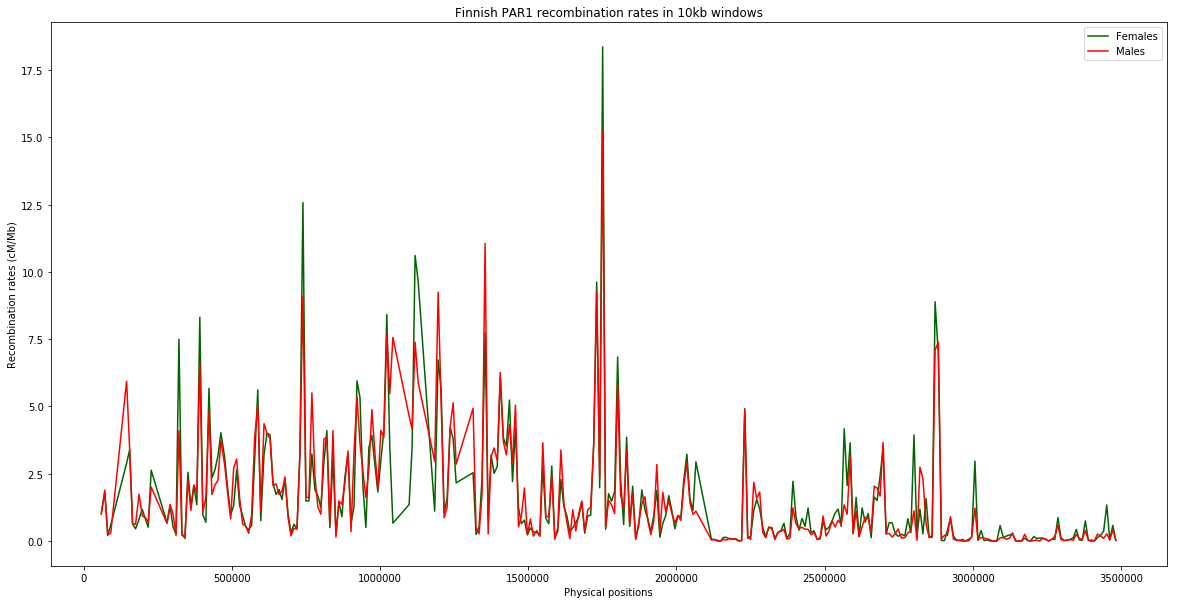

In [41]:
# Calling plot function from matplotlib to add y and x to the current plot and also add individual colours to each
plt.plot(Finns_PAR1_10kb['StartPos'], Finns_PAR1_10kb['Fem_rate'], color = 'darkgreen')
plt.plot(Finns_PAR1_10kb['StartPos'], Finns_PAR1_10kb['Male_rate'], color = 'red')
#plt.plot(Finns_PAR1_10kb['StartPos'], Finns_PAR1_10kb['Avg_rate'], color = 'black')

# Labels
plt.xlabel("Physical positions")
plt.ylabel("Recombination rates (cM/Mb)")
plt.title("Finnish PAR1 recombination rates in 10kb windows")
plt.legend(["Females", "Males"])

# Save image in current window
fig = plt.gcf().set_size_inches(20, 10)

# Save as jpeg file
plt.savefig("Finns_PAR1_10kb_fem_vs_male.jpg")


Text(0.5, 0, 'Physical positions')

Text(0, 0.5, 'Recombination rates (cM/Mb)')

Text(0.5, 1.0, 'Finnish PAR1 recombination rates in 20kb windows')

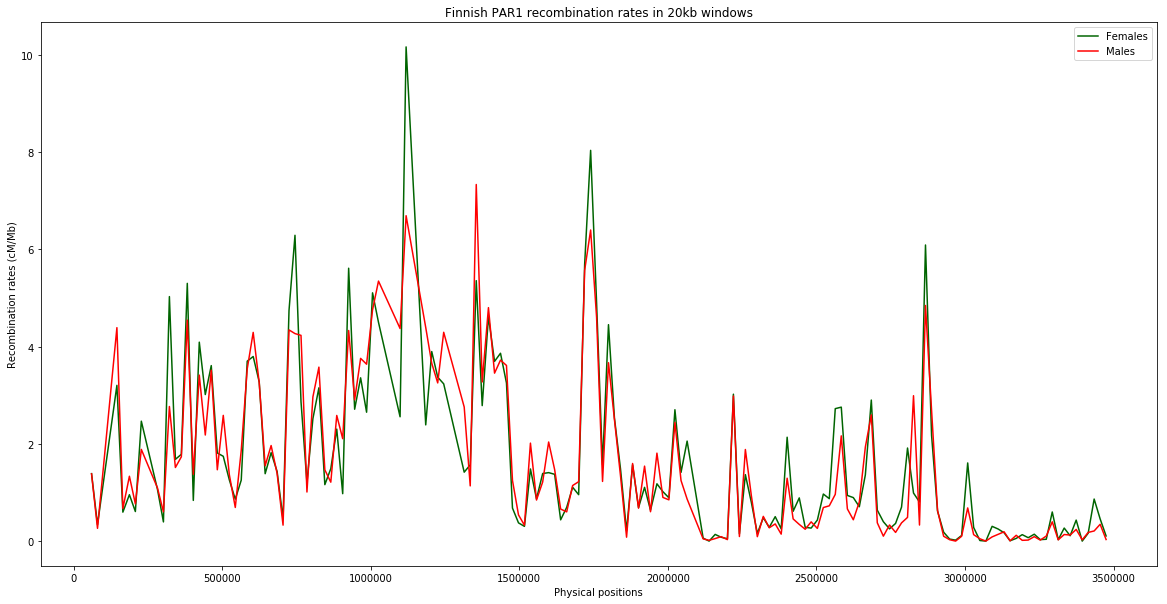

In [42]:
# Calling plot function from matplotlib to add y and x to the current plot and also add individual colours to each
plt.plot(Finns_PAR1_20kb['StartPos'], Finns_PAR1_20kb['Fem_rate'], color = 'darkgreen')
plt.plot(Finns_PAR1_20kb['StartPos'], Finns_PAR1_20kb['Male_rate'], color = 'red')
#plt.plot(Finns_PAR1_20kb['StartPos'], Finns_PAR1_20kb['Avg_rate'], color = 'black')

# Labels
plt.xlabel("Physical positions")
plt.ylabel("Recombination rates (cM/Mb)")
plt.title("Finnish PAR1 recombination rates in 20kb windows")
plt.legend(["Females", "Males"])

# Save image in current window
fig = plt.gcf().set_size_inches(20, 10)

# Save as jpeg file
plt.savefig("Finns_PAR1_20kb_fem_vs_male.jpg")

Text(0.5, 0, 'Physical positions')

Text(0, 0.5, 'Recombination rates (cM/Mb)')

Text(0.5, 1.0, 'Finnish PAR1 recombination rates in 50kb windows')

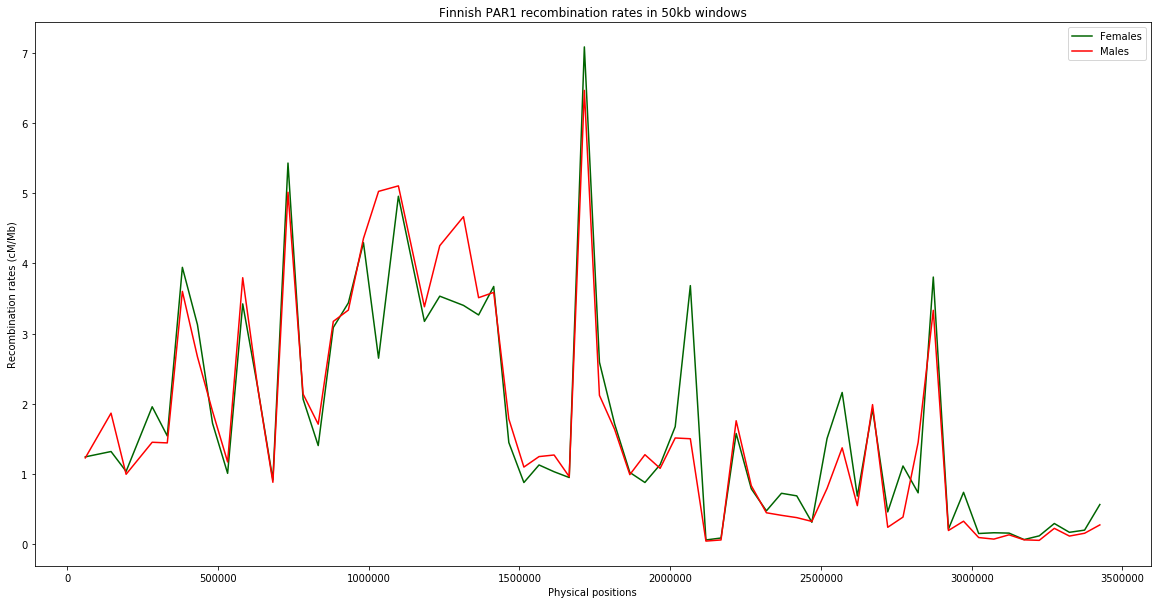

In [43]:
# Calling plot function from matplotlib to add y and x to the current plot and also add individual colours to each
plt.plot(Finns_PAR1_50kb['StartPos'], Finns_PAR1_50kb['Fem_rate'], color = 'darkgreen')
plt.plot(Finns_PAR1_50kb['StartPos'], Finns_PAR1_50kb['Male_rate'], color = 'red')
#plt.plot(Finns_PAR1_50kb['StartPos'], Finns_PAR1_50kb['Avg_rate'], color = 'black')

# Labels
plt.xlabel("Physical positions")
plt.ylabel("Recombination rates (cM/Mb)")
plt.title("Finnish PAR1 recombination rates in 50kb windows")
plt.legend(["Females", "Males"])

# Save image in current window
fig = plt.gcf().set_size_inches(20, 10)

# Save as jpeg file
plt.savefig("Finns_PAR1_50kb_fem_vs_male.jpg")

Text(0.5, 0, 'Physical positions')

Text(0, 0.5, 'Recombination rates (cM/Mb)')

Text(0.5, 1.0, 'Finnish PAR1 recombination rates in 100kb windows')

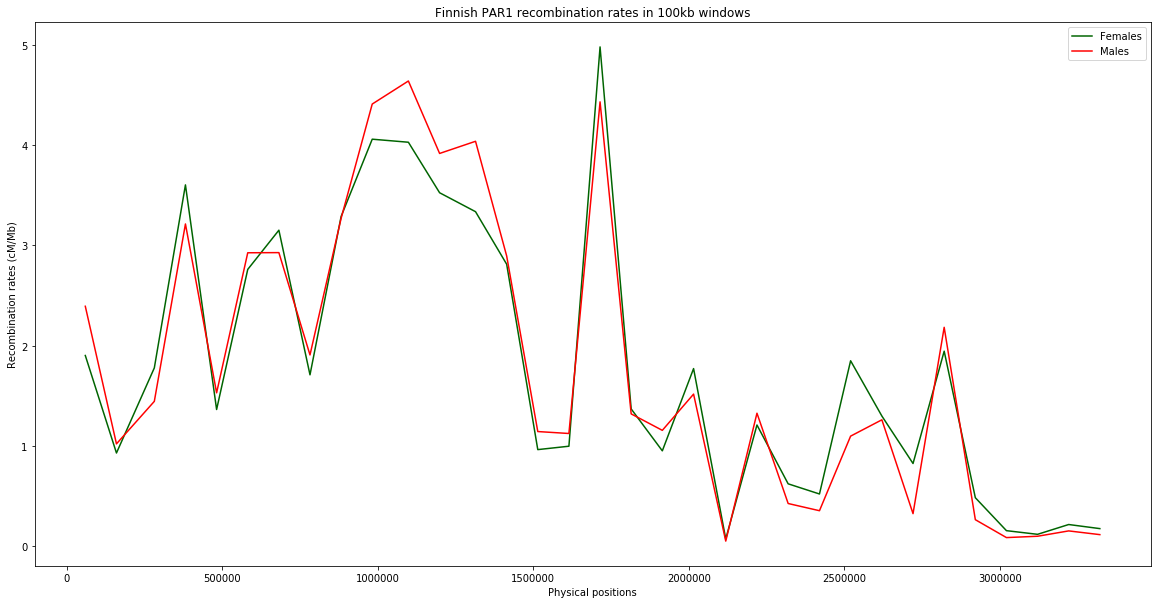

In [44]:
# Calling plot function from matplotlib to add y and x to the current plot and also add individual colours to each
plt.plot(Finns_PAR1_100kb['StartPos'], Finns_PAR1_100kb['Fem_rate'], color = 'darkgreen')
plt.plot(Finns_PAR1_100kb['StartPos'], Finns_PAR1_100kb['Male_rate'], color = 'red')
#plt.plot(Finns_PAR1_100kb['StartPos'], Finns_PAR1_100kb['Avg_rate'], color = 'black')

# Labels
plt.xlabel("Physical positions")
plt.ylabel("Recombination rates (cM/Mb)")
plt.title("Finnish PAR1 recombination rates in 100kb windows")
plt.legend(["Females", "Males"])

# Save image in current window
fig = plt.gcf().set_size_inches(20, 10)

# Save as jpeg file
plt.savefig("Finns_PAR1_100kb_fem_vs_male.jpg")

### Across cohorts

#### Comparing across samples (Migraine, 1KG_Finns and CEU)

Text(0.5, 0, 'Physical positions')

Text(0, 0.5, 'Recombination rates (cM/Mb)')

Text(0.5, 1.0, '1KG Finns v/s CEU XTR recombination rates in 10kb windows for females only')

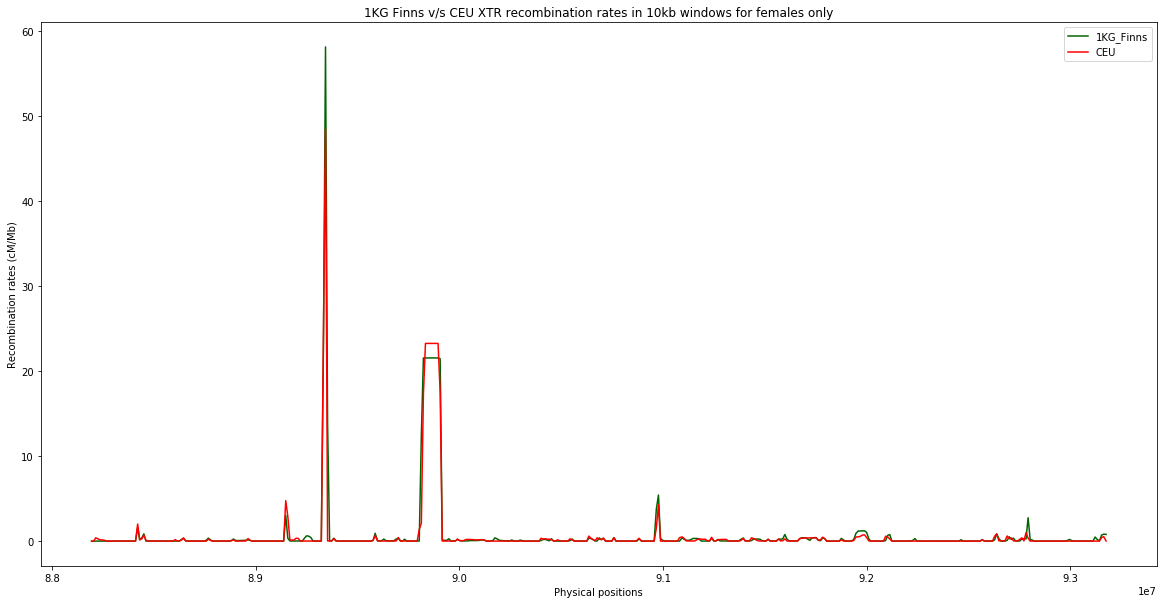

In [45]:
# Calling plot function from matplotlib to add y and x to the current plot and also add individual colours to each
#plt.plot(PAR1_fem_combined_50kb['StartPos'], PAR1_fem_combined_50kb['Migfi'], color = 'darkgreen')
#plt.plot(PAR1_fem_combined_50kb['StartPos'], PAR1_fem_combined_50kb['KG_Finns'], color = 'red')
#plt.plot(PAR1_fem_combined_50kb['StartPos'], PAR1_fem_combined_50kb['CEU'], color = 'red')
#plt.plot(PAR2_fem_combined_50kb['StartPos'], PAR2_fem_combined_50kb['Migfi'], color = 'darkgreen')
#plt.plot(PAR2_fem_combined_50kb['StartPos'], PAR2_fem_combined_50kb['KG_Finns'], color = 'darkgreen')
#plt.plot(PAR2_fem_combined_50kb['StartPos'], PAR2_fem_combined_50kb['CEU'], color = 'red')
#plt.plot(XTR_fem_combined_10kb['StartPos'], XTR_fem_combined_10kb['Migfi'], color = 'darkgreen')
plt.plot(XTR_fem_combined_10kb['StartPos'], XTR_fem_combined_10kb['KG_Finns'], color = 'darkgreen')
plt.plot(XTR_fem_combined_10kb['StartPos'], XTR_fem_combined_10kb['CEU'], color = 'red')

# Labels
plt.xlabel("Physical positions")
plt.ylabel("Recombination rates (cM/Mb)")
#plt.title("Finnish PAR1 recombination rates in 50kb windows for females only")
plt.title("1KG Finns v/s CEU XTR recombination rates in 10kb windows for females only")
plt.legend(["1KG_Finns", "CEU"])

# Save image in current window
fig = plt.gcf().set_size_inches(20, 10)

# Save as jpeg file
#plt.savefig("Migraine_vs_CEU_50kb_females_only.jpg")
plt.savefig("1KG_Finns_vs_CEU_10kb_females_only_XTR.jpg")

Text(0.5, 0, 'Physical positions')

Text(0, 0.5, 'Recombination rates (cM/Mb)')

Text(0.5, 1.0, 'Migfi v/s CEU XTR recombination rates in 10kb windows for males only')

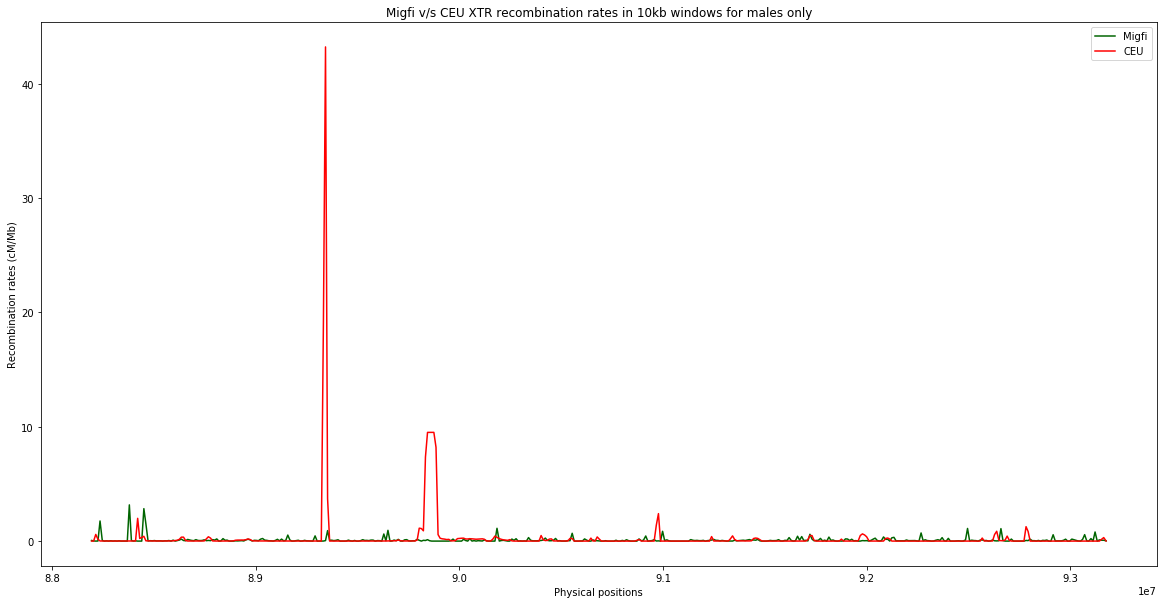

In [46]:
# Calling plot function from matplotlib to add y and x to the current plot and also add individual colours to each
#plt.plot(PAR1_male_combined_50kb['StartPos'], PAR1_male_combined_50kb['Migfi'], color = 'darkgreen')
#plt.plot(PAR1_male_combined_50kb['StartPos'], PAR1_fem_combined_50kb['KG_Finns'], color = 'red')
#plt.plot(PAR1_male_combined_50kb['StartPos'], PAR1_male_combined_50kb['CEU'], color = 'red')
#plt.plot(PAR2_male_combined_50kb['StartPos'], PAR2_male_combined_50kb['Migfi'], color = 'darkgreen')
#plt.plot(PAR2_male_combined_50kb['StartPos'], PAR2_male_combined_50kb['KG_Finns'], color = 'darkgreen')
#plt.plot(PAR2_male_combined_50kb['StartPos'], PAR2_male_combined_50kb['CEU'], color = 'red')
plt.plot(XTR_male_combined_10kb['StartPos'], XTR_male_combined_10kb['Migfi'], color = 'darkgreen')
#plt.plot(XTR_male_combined_10kb['StartPos'], XTR_male_combined_10kb['KG_Finns'], color = 'darkgreen')
plt.plot(XTR_male_combined_10kb['StartPos'], XTR_male_combined_10kb['CEU'], color = 'red')


# Labels
plt.xlabel("Physical positions")
plt.ylabel("Recombination rates (cM/Mb)")
#plt.title("Finnish PAR1 recombination rates in 50kb windows for males only")
plt.title("Migfi v/s CEU XTR recombination rates in 10kb windows for males only")
plt.legend(["Migfi", "CEU"])

# Save image in current window
fig = plt.gcf().set_size_inches(20, 10)

# Save as jpeg file
#plt.savefig("Migraine_Finns_vs_CEU_50kb_males_only.jpg")
plt.savefig("Migfi_vs_CEU_10kb_males_only_XTR.jpg")

### Randomly chosen Migraine dataset wrt region of X-chromosome under study - 10kb, 20kb, 50kb scales¶

In [55]:
## Random Migraine data for 10kb scales
Finns_random_PAR1_10kb = kb_scale(Finns_random_PAR1, 10000)
Finns_random_PAR2_10kb = kb_scale(Finns_random_PAR2, 10000)
Finns_random_XTR_10kb = kb_scale(Finns_random_XTR, 10000)

## Random Migraine data for 20kb scales
Finns_random_PAR1_20kb = kb_scale(Finns_random_PAR1, 20000)
Finns_random_PAR2_20kb = kb_scale(Finns_random_PAR2, 20000)
Finns_random_XTR_20kb = kb_scale(Finns_random_XTR, 20000)

## Random Migraine data for 50kb scales
Finns_random_PAR1_50kb = kb_scale(Finns_random_PAR1, 50000)
Finns_random_PAR2_50kb = kb_scale(Finns_random_PAR2, 50000)
Finns_random_XTR_50kb = kb_scale(Finns_random_XTR, 50000)

## Random Migraine data for 100kb scales
Finns_random_PAR1_100kb = kb_scale(Finns_random_PAR1, 100000)
Finns_random_PAR2_100kb = kb_scale(Finns_random_PAR2, 100000)
Finns_random_XTR_100kb = kb_scale(Finns_random_XTR, 100000)

## Function to get randomly chosen Migraine + CEU datasetacross samples in various scales (averaging values within windows)

In [58]:
## Function for averaging in windows

## Logic:
## 1). Read ORIGINAL dataframe
## 2). Access it row by row
## 3). Make an if-condition to check that the "value" of column "Positions" in the row 
##     should be less than value + 10000 
## 4). If yes above, then in the FINAL dataframe, store the above "Position" value
## 5). Keep on accessing the ORIGINAL dataframe, row by row, and keep on storing the values of each rows
##     for all the named columns in a temporary dataframe
## 6). When the condition in #3 fails, then store the value of column "Position" for the last row indexed,
##     in the FINAL dataframe
## 7). When the condition in #3 fails, then take mean of all the "stored" columns in the temporary dataframe
## 8). Store the above mean values in different columns in the FINAL dataframe
## 9). Increment the counter aka "position" by 10000 to create mean values every 10kb.

def kb_scale_combined(x, win):

    # Empty lists
    start_position_temp = []
    migfi_rate_temp = []
    ceu_rate_temp = []

    final_df =  pd.DataFrame(columns=['StartPos', 'Migfi_Random', 'CEU'])
    
    # Initiating the window 
    window_start = x.iloc[1]['Positions']

    # Loop through the entire dataframe row by row
    for i in range(x.shape[0]):
        
        # Checking the condition that a position is within the window
        if x.iloc[i]['Positions'] <= (window_start + win):
         
            # Save the start position for the window
            start_position_temp.append(x.iloc[i]['Positions']) 

            # Select rates
            migfi_rate_temp.append(x.iloc[i]['Migfi_Random'])
            ceu_rate_temp.append(x.iloc[i]['CEU'])

        else:
            # Save everything in a dataframe
            new_df = pd.DataFrame( [[ start_position_temp[0], np.mean(migfi_rate_temp), 
                                   np.mean(ceu_rate_temp) ]],
                               columns=['StartPos', 'Migfi_Random', 'CEU'])
            
            # Concantenate values for all columns above as each position is looped through
            final_df = pd.concat([final_df,new_df])

            # Set the temp lists to empty
            start_position_temp = [x.iloc[i]['Positions']]
            migfi_rate_temp = [x.iloc[i]['Migfi_Random']]
            ceu_rate_temp = [x.iloc[i]['CEU']]
            
            # Set the window index to where the "position + window size" ends, so that window moves ahead 
            window_start = x.iloc[i]['Positions']


    # Return the Final dataframe
    return(final_df)

#### PAR1 region across samples - 50kb scales

In [74]:
## PAR1 female data for 50kb windows
#PAR1_random_fem_combined_50kb = kb_scale_combined(PAR1_fem_random_ceu_combined, 50000)

## PAR1 male data for 50kb windows
#PAR1_random_male_combined_50kb = kb_scale_combined(PAR1_male_random_ceu_combined, 50000)

## PAR1 avg data for 50kb windows
#PAR1_random_avg_combined_50kb = kb_scale_combined(PAR1_avg_random_ceu_combined, 50000)
PAR1_random_avg_combined_100kb = kb_scale_combined(PAR1_avg_random_ceu_combined, 100000)

#### PAR2 region across samples - 50kb scales

In [60]:
## PAR2 female data for 50kb windows
PAR2_random_fem_combined_50kb = kb_scale_combined(PAR2_fem_random_ceu_combined, 50000)

## PAR2 male data for 50kb windows
PAR2_random_male_combined_50kb = kb_scale_combined(PAR2_male_random_ceu_combined, 50000)

## PAR2 avg data for 50kb windows
PAR2_random_avg_combined_50kb = kb_scale_combined(PAR2_avg_random_ceu_combined, 50000)

#### XTR region across samples - 50kb scales

In [61]:
## XTR female data for 10kb and 20kb windows
XTR_random_fem_combined_10kb = kb_scale_combined(XTR_fem_random_ceu_combined, 10000)

## XTR male data for 10kb and 20kb windows
XTR_random_male_combined_10kb = kb_scale_combined(XTR_male_random_ceu_combined, 10000)

## XTR avg data for 10kb and 20kb windows
XTR_random_avg_combined_10kb = kb_scale_combined(XTR_avg_random_ceu_combined, 10000)

## Analysis, Figures of randomly chosen Migraine samples v/s CEU etc...

Text(0.5, 0, 'Physical positions')

Text(0, 0.5, 'Recombination rates (cM/Mb)')

Text(0.5, 1.0, 'Random migraine finnish PAR1 recombination rates in 10kb windows')

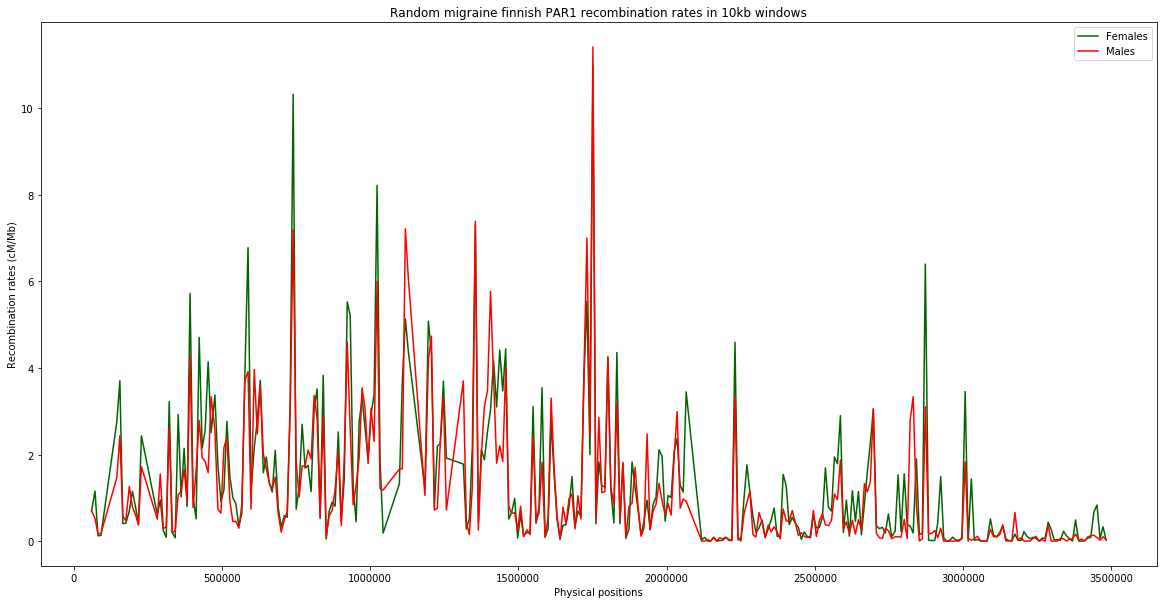

In [62]:
# Calling plot function from matplotlib to add y and x to the current plot and also add individual colours to each
plt.plot(Finns_random_PAR1_10kb['StartPos'], Finns_random_PAR1_10kb['Fem_rate'], color = 'darkgreen')
plt.plot(Finns_random_PAR1_10kb['StartPos'], Finns_random_PAR1_10kb['Male_rate'], color = 'red')
#plt.plot(Finns_random_PAR1_10kb['StartPos'], Finns_random_PAR1_10kb['Avg_rate'], color = 'black')

# Labels
plt.xlabel("Physical positions")
plt.ylabel("Recombination rates (cM/Mb)")
plt.title("Random migraine finnish PAR1 recombination rates in 10kb windows")
plt.legend(["Females", "Males"])

# Save image in current window
fig = plt.gcf().set_size_inches(20, 10)

# Save as jpeg file
plt.savefig("Finns_PAR1_10kb_fem_vs_male_random.jpg")


Text(0.5, 0, 'Physical positions')

Text(0, 0.5, 'Recombination rates (cM/Mb)')

Text(0.5, 1.0, 'Random migraine finnish PAR1 recombination rates in 20kb windows')

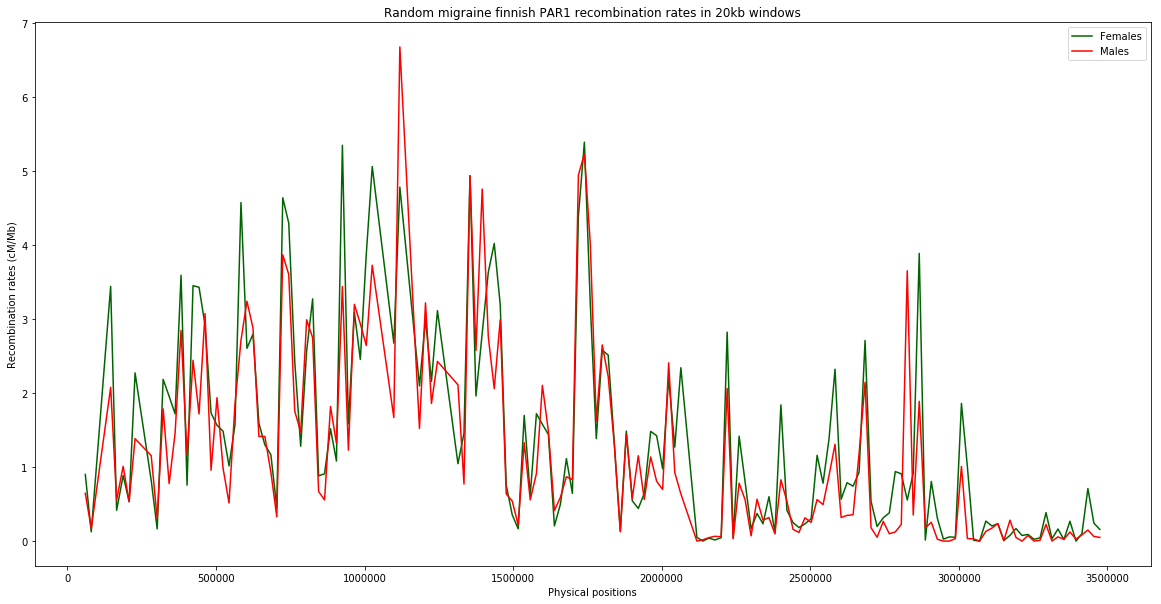

In [63]:
# Calling plot function from matplotlib to add y and x to the current plot and also add individual colours to each
plt.plot(Finns_random_PAR1_20kb['StartPos'], Finns_random_PAR1_20kb['Fem_rate'], color = 'darkgreen')
plt.plot(Finns_random_PAR1_20kb['StartPos'], Finns_random_PAR1_20kb['Male_rate'], color = 'red')
#plt.plot(Finns_random_PAR1_20kb['StartPos'], Finns_random_PAR1_20kb['Avg_rate'], color = 'black')

# Labels
plt.xlabel("Physical positions")
plt.ylabel("Recombination rates (cM/Mb)")
plt.title("Random migraine finnish PAR1 recombination rates in 20kb windows")
plt.legend(["Females", "Males"])

# Save image in current window
fig = plt.gcf().set_size_inches(20, 10)

# Save as jpeg file
plt.savefig("Finns_PAR1_20kb_fem_vs_male_random.jpg")

Text(0.5, 0, 'Physical positions')

Text(0, 0.5, 'Recombination rates (cM/Mb)')

Text(0.5, 1.0, 'Random migraine finnish PAR1 recombination rates in 50kb windows')

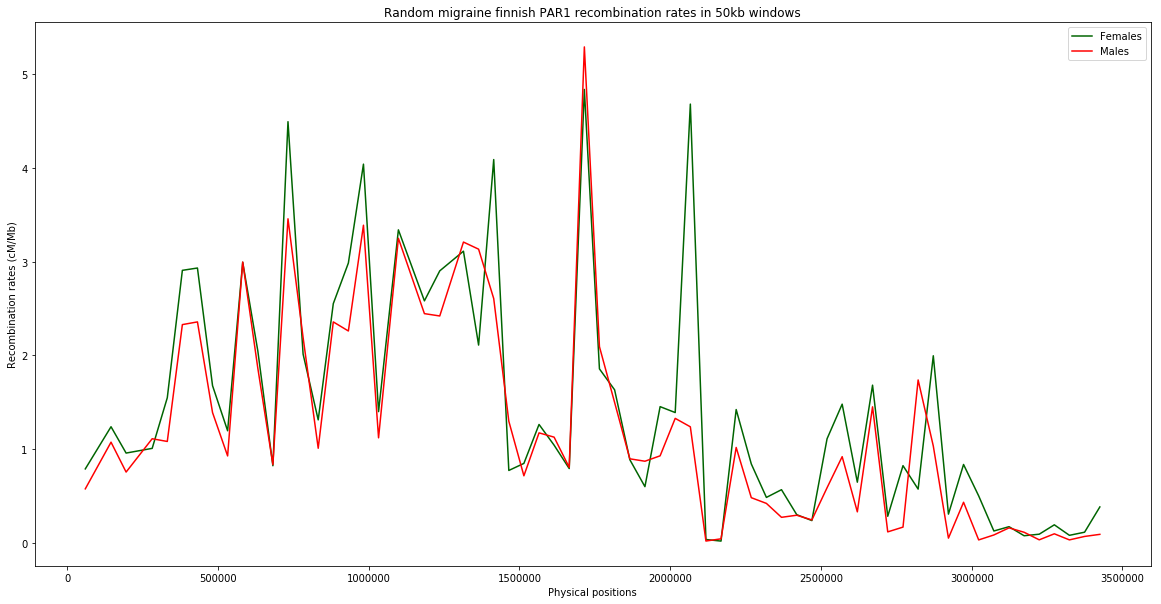

In [64]:
# Calling plot function from matplotlib to add y and x to the current plot and also add individual colours to each
plt.plot(Finns_random_PAR1_50kb['StartPos'], Finns_random_PAR1_50kb['Fem_rate'], color = 'darkgreen')
plt.plot(Finns_random_PAR1_50kb['StartPos'], Finns_random_PAR1_50kb['Male_rate'], color = 'red')
#plt.plot(Finns_random_PAR1_10kb['StartPos'], Finns_random_PAR1_50kb['Avg_rate'], color = 'black')

# Labels
plt.xlabel("Physical positions")
plt.ylabel("Recombination rates (cM/Mb)")
plt.title("Random migraine finnish PAR1 recombination rates in 50kb windows")
plt.legend(["Females", "Males"])

# Save image in current window
fig = plt.gcf().set_size_inches(20, 10)

# Save as jpeg file
plt.savefig("Finns_PAR1_50kb_fem_vs_male_random.jpg")

Text(0.5, 0, 'Physical positions')

Text(0, 0.5, 'Recombination rates (cM/Mb)')

Text(0.5, 1.0, 'Random migraine finnish PAR1 recombination rates in 100kb windows')

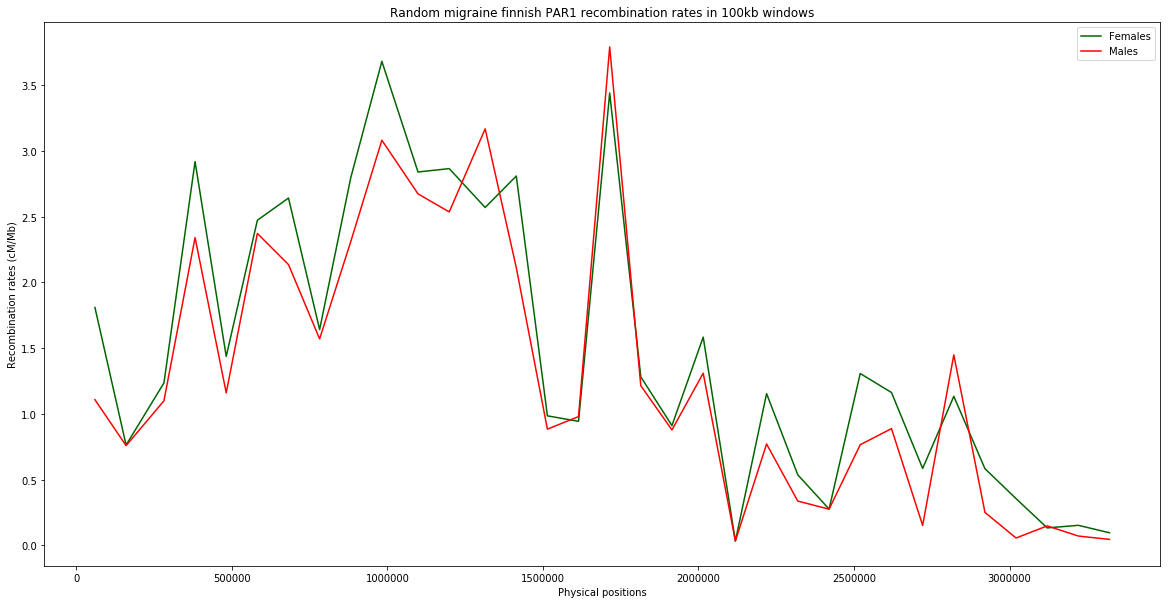

In [65]:
# Calling plot function from matplotlib to add y and x to the current plot and also add individual colours to each
plt.plot(Finns_random_PAR1_100kb['StartPos'], Finns_random_PAR1_100kb['Fem_rate'], color = 'darkgreen')
plt.plot(Finns_random_PAR1_100kb['StartPos'], Finns_random_PAR1_100kb['Male_rate'], color = 'red')
#plt.plot(Finns_random_PAR1_100kb['StartPos'], Finns_random_PAR1_100kb['Avg_rate'], color = 'black')

# Labels
plt.xlabel("Physical positions")
plt.ylabel("Recombination rates (cM/Mb)")
plt.title("Random migraine finnish PAR1 recombination rates in 100kb windows")
plt.legend(["Females", "Males"])

# Save image in current window
fig = plt.gcf().set_size_inches(20, 10)

# Save as jpeg file
plt.savefig("Finns_PAR1_100kb_fem_vs_male_random.jpg")

### Across cohorts

### Comparing across samples (Randomly chosen Migraine samples and CEU)

Text(0.5, 0, 'Physical positions')

Text(0, 0.5, 'Recombination rates (cM/Mb)')

Text(0.5, 1.0, 'Random Migraine Finns v/s CEU XTR recombination rates in 10kb windows for females only')

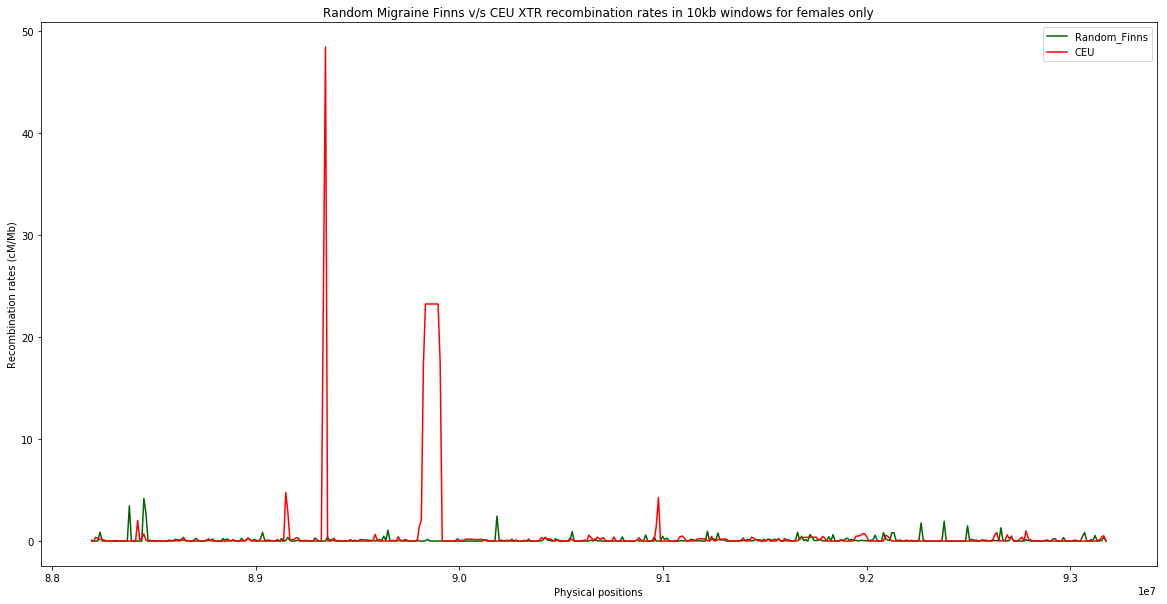

In [69]:
# Calling plot function from matplotlib to add y and x to the current plot and also add individual colours to each
#plt.plot(PAR1_random_fem_combined_50kb['StartPos'], PAR1_random_fem_combined_50kb['Migfi_Random'], color = 'darkgreen')
#plt.plot(PAR1_random_fem_combined_50kb['StartPos'], PAR1_random_fem_combined_50kb['CEU'], color = 'red')
#plt.plot(PAR2_random_fem_combined_50kb['StartPos'], PAR2_random_fem_combined_50kb['Migfi_Random'], color = 'darkgreen')
#plt.plot(PAR2_random_fem_combined_50kb['StartPos'], PAR2_random_fem_combined_50kb['CEU'], color = 'red')
plt.plot(XTR_random_fem_combined_10kb['StartPos'], XTR_random_fem_combined_10kb['Migfi_Random'], color = 'darkgreen')
plt.plot(XTR_random_fem_combined_10kb['StartPos'], XTR_random_fem_combined_10kb['CEU'], color = 'red')

# Labels
plt.xlabel("Physical positions")
plt.ylabel("Recombination rates (cM/Mb)")
#plt.title("Random Migraine Finns v/s CEU PAR1 recombination rates in 50kb windows for females only")
#plt.title("Random Migraine Finns v/s CEU PAR2 recombination rates in 50kb windows for females only")
plt.title("Random Migraine Finns v/s CEU XTR recombination rates in 10kb windows for females only")
plt.legend(["Random_Finns", "CEU"])

# Save image in current window
fig = plt.gcf().set_size_inches(20, 10)

# Save as jpeg file
#plt.savefig("Random_Finns_vs_CEU_10kb_females_only_PAR1.jpg")
#plt.savefig("Random_Finns_vs_CEU_10kb_females_only_PAR2.jpg")
plt.savefig("Random_Finns_vs_CEU_10kb_females_only_XTR.jpg")

Text(0.5, 0, 'Physical positions')

Text(0, 0.5, 'Recombination rates (cM/Mb)')

Text(0.5, 1.0, 'Random Migraine Finns v/s CEU XTR recombination rates in 10kb windows for males only')

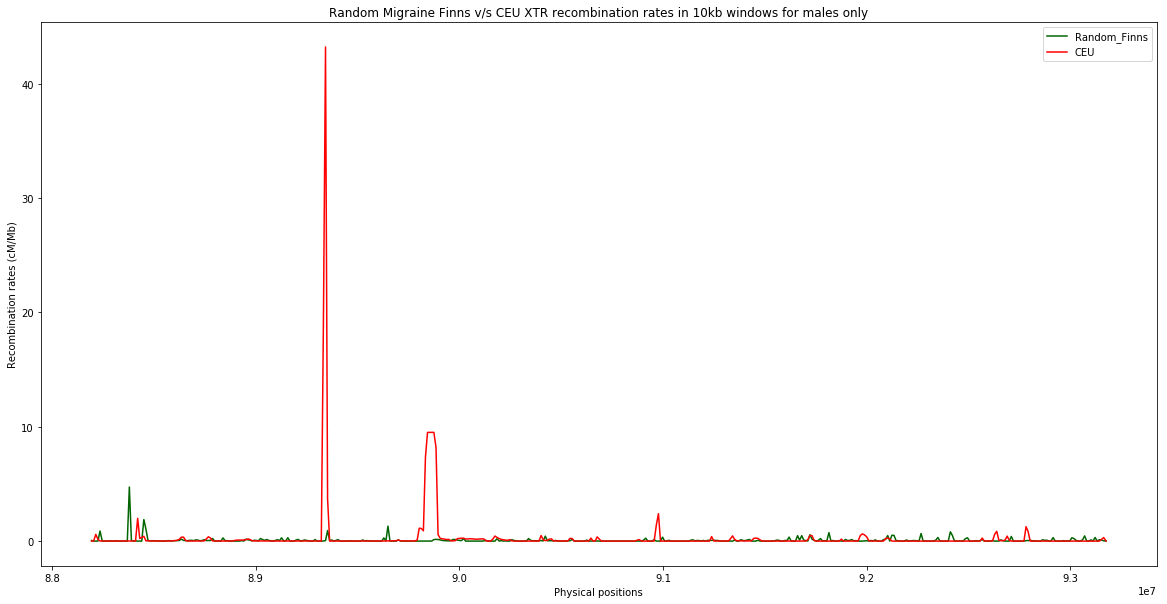

In [72]:
# Calling plot function from matplotlib to add y and x to the current plot and also add individual colours to each
#plt.plot(PAR1_random_male_combined_50kb['StartPos'], PAR1_random_male_combined_50kb['Migfi_Random'], color = 'darkgreen')
#plt.plot(PAR1_random_male_combined_50kb['StartPos'], PAR1_random_male_combined_50kb['CEU'], color = 'red')
#plt.plot(PAR2_random_male_combined_50kb['StartPos'], PAR2_random_male_combined_50kb['Migfi_Random'], color = 'darkgreen')
#plt.plot(PAR2_random_male_combined_50kb['StartPos'], PAR2_random_male_combined_50kb['CEU'], color = 'red')
plt.plot(XTR_random_male_combined_10kb['StartPos'], XTR_random_male_combined_10kb['Migfi_Random'], color = 'darkgreen')
plt.plot(XTR_random_male_combined_10kb['StartPos'], XTR_random_male_combined_10kb['CEU'], color = 'red')

# Labels
plt.xlabel("Physical positions")
plt.ylabel("Recombination rates (cM/Mb)")
#plt.title("Random Migraine Finns v/s CEU PAR1 recombination rates in 50kb windows for males only")
#plt.title("Random Migraine Finns v/s CEU PAR2 recombination rates in 50kb windows for males only")
plt.title("Random Migraine Finns v/s CEU XTR recombination rates in 10kb windows for males only")
plt.legend(["Random_Finns", "CEU"])

# Save image in current window
fig = plt.gcf().set_size_inches(20, 10)

# Save as jpeg file
#plt.savefig("Random_Finns_vs_CEU_50kb_males_only_PAR1.jpg")
#plt.savefig("Random_Finns_vs_CEU_50kb_males_only_PAR2.jpg")
plt.savefig("Random_Finns_vs_CEU_10kb_males_only_XTR.jpg")

Text(0.5, 0, 'Physical positions')

Text(0, 0.5, 'Recombination rates (cM/Mb)')

Text(0.5, 1.0, 'Random Migraine Finns v/s CEU PAR1 recombination rates in 100kb windows for averaged set')

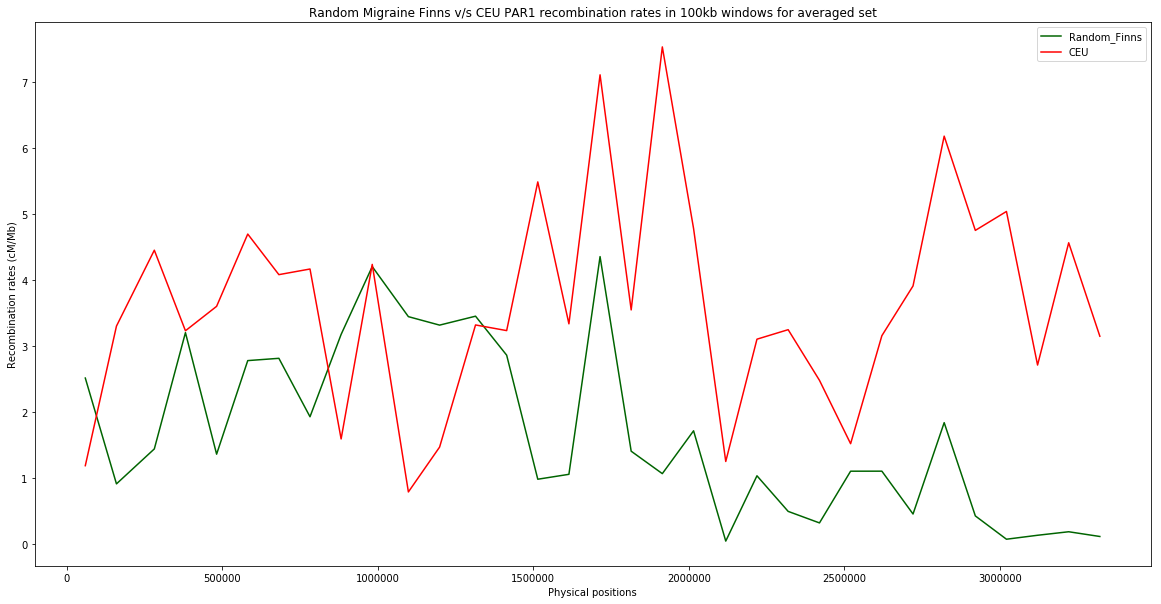

In [75]:
# Calling plot function from matplotlib to add y and x to the current plot and also add individual colours to each
#plt.plot(PAR1_random_avg_combined_50kb['StartPos'], PAR1_random_avg_combined_50kb['Migfi_Random'], color = 'darkgreen')
#plt.plot(PAR1_random_avg_combined_50kb['StartPos'], PAR1_random_avg_combined_50kb['CEU'], color = 'red')
plt.plot(PAR1_random_avg_combined_100kb['StartPos'], PAR1_random_avg_combined_100kb['Migfi_Random'], color = 'darkgreen')
plt.plot(PAR1_random_avg_combined_100kb['StartPos'], PAR1_random_avg_combined_100kb['CEU'], color = 'red')
#plt.plot(PAR2_random_avg_combined_50kb['StartPos'], PAR2_random_avg_combined_50kb['Migfi_Random'], color = 'darkgreen')
#plt.plot(PAR2_random_avg_combined_50kb['StartPos'], PAR2_random_avg_combined_50kb['CEU'], color = 'red')
#plt.plot(XTR_random_avg_combined_10kb['StartPos'], XTR_random_avg_combined_10kb['Migfi_Random'], color = 'darkgreen')
#plt.plot(XTR_random_avg_combined_10kb['StartPos'], XTR_random_avg_combined_10kb['CEU'], color = 'red')

# Labels
plt.xlabel("Physical positions")
plt.ylabel("Recombination rates (cM/Mb)")
plt.title("Random Migraine Finns v/s CEU PAR1 recombination rates in 100kb windows for averaged set")
#plt.title("Random Migraine Finns v/s CEU PAR2 recombination rates in 50kb windows for averaged set")
#plt.title("Random Migraine Finns v/s CEU XTR recombination rates in 10kb windows for averaged set")
plt.legend(["Random_Finns", "CEU"])

# Save image in current window
fig = plt.gcf().set_size_inches(20, 10)

# Save as jpeg file
plt.savefig("Random_Finns_vs_CEU_100kb_averaged_only_PAR1.jpg")
#plt.savefig("Random_Finns_vs_CEU_50kb_averaged_only_PAR2.jpg")
#plt.savefig("Random_Finns_vs_CEU_10kb_averaged_only_XTR.jpg")

### Statistical Testing for differences in rates

In [48]:
## Wilcoxon signed rank test for difference in means of two datasets
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

# Seed the random number generator
seed(1)

# Compare samples
#stat, p = wilcoxon(PAR1_fem_combined_50kb['Migfi'], PAR1_fem_combined_50kb['CEU'])
#stat, q = wilcoxon(PAR1_fem_combined_50kb['KG_Finns'], PAR1_fem_combined_50kb['CEU'])
stat, r = wilcoxon(PAR1_fem_combined_50kb['KG_Finns'], PAR1_fem_combined_50kb['Migfi'])
print('Statistics=%.3f, p=%.3f' % (stat, r))

# Interpret
alpha = (0.05/PAR1_fem_combined_50kb.shape[0])
if r > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')


Statistics=565.000, p=0.001
Same distribution (fail to reject H0)


## PCA on migraine samples